final A & B
A [[0.30119641 0.29793777]
 [0.17353612 0.2601095 ]]
B [[-0.00752434  0.12980653]
 [ 0.22489719  0.28792535]]


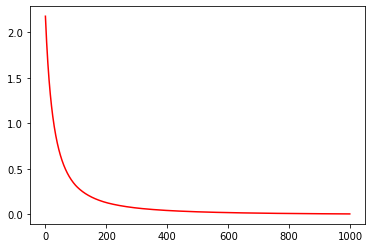

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt

k=2
A =  np.random.rand(k,k)
B =  np.random.rand(k,k)
x = np.ones(k)

def sigmoid(y):
    u = np.zeros(len(y))
    for i in range(len(y)):
        try:
            u[i] = math.exp(y[i]) / (math.exp(y[i]) + 1)
        except OverflowError:
            u[i] = 1.0
    return u

# print("A",A)
# print("B",B)
# print("x",x)

learning_time = 1000
learning_rate = 0.001
threshold = 0
L_list = []
for time in range(learning_time):
    if time % 100 == 0:
        learning_rate = learning_rate * 0.95
#         weight decay
    y = np.matmul(A,x)

    u = sigmoid(y)

    v = np.matmul(B,x)

    element_wise = np.multiply(u,v)

    z = np.matmul(A,element_wise)

    w = np.matmul(A,z)

    L = np.sum(np.multiply(w,w))

#     print("L",L)
    L_list.append(L)
#     plt.plot(time,L,'ro')
    

    trans_A = np.transpose(A)
    
    deriv_y = np.multiply(np.matmul(np.matmul(2*trans_A,trans_A),w),v)
    
    A_der = np.matmul(2*w[:,None],z[None,:])+\
        np.matmul(np.matmul(2*trans_A,w)[:,None],np.multiply(u,v)[None,:])+\
        np.matmul(np.multiply(sigmoid(deriv_y),np.ones(k)-sigmoid(deriv_y))[:,None],x[None,:])
    
    
    
    A = A - learning_rate * A_der
    
#     print("A",A)

    B_der = np.matmul(np.multiply(np.matmul(np.matmul(2*trans_A,trans_A),w),u)[:,None],x[None,:])
    
    
    B = B - learning_rate * B_der
    
#     print("B",B)
    
    if L < threshold:
        plt.plot(range(time+1),L_list,'r-')
        print("final A & B")
        print("A",A)
        print("B",B)
        break;
    elif time == learning_time - 1:
        plt.plot(range(time+1),L_list,'r-')
        print("final A & B")
        print("A",A)
        print("B",B)

plt.show()

In [20]:
import numpy as np
x = np.ones(2)
A = np.random.rand(2,3)
x_2 = np.ones((3,4))
# y = np.matmul(A,x) 报错
y_1 = np.matmul(x,A)
# y_2 = np.matmul(x_2,A) 报错
y_3 = np.matmul(A,x_2)
print("y_1",np.shape(y_1))
print("y_3",np.shape(y_3))
B = np.random.rand(2,3)
print("B",B)
C = np.random.rand(2,3)
print("C",C)
print("B*C",B*C)

y_1 (3,)
y_3 (2, 4)
B [[0.80807011 0.41732109 0.51285652]
 [0.39080616 0.73454254 0.23456342]]
C [[0.16611455 0.34316692 0.24604083]
 [0.87772276 0.10017839 0.4196628 ]]
B*C [[0.1342322  0.14321079 0.12618365]
 [0.34301946 0.07358529 0.09843754]]
